In [12]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

In [14]:
ds = pd.read_csv("../artifacts/generated/dataset.csv")
ds.head()

,item_id,item_name_in_en_us,main_image_id,image_id,height,width,path
0,B0896LJNLH,AmazonBasics Serene 16-Piece Old Fashioned and...,61izEZdhlaL,61izEZdhlaL,1197,894,07/075e5d67.jpg
1,B07HCR1LSQ,[Find] Amazon Collection Platinum Plated Sterl...,61kDp2x8tPL,61kDp2x8tPL,1000,1000,c9/c923418f.jpg
2,B075DQBBJZ,Arizona Desert Sand Horizon Photo with Wood Ha...,91IjyKZ76qL,91IjyKZ76qL,2560,2560,c6/c6889ed4.jpg
3,B07S74D9T7,AmazonBasics Adjustable Speaker Stand - 3.8 to...,71x4c-BafpL,71x4c-BafpL,2560,2560,2b/2b90e918.jpg
4,B01N27SMXC,Amazon Brand - The Fix Women's Foley Tassel Sl...,71-eMu0gN+L,71-eMu0gN+L,704,1770,2c/2c0416de.jpg


In [15]:
def display_image_with_index(display_image_index):
    image_path = "../artifacts/abo-images-small/images/small/" + ds["path"][display_image_index]
    image_pil = Image.open(image_path).convert('RGB')
    print("Image Info: ", image_pil.format, image_pil.size, image_pil.mode) # (width, height) ; shape is not valid
    plt.figure(figsize = (25,1))
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

In [16]:
def display_image_with_item(item_id):
    path = ds[ds["item_id"] == item_id]["path"].to_list()[0]
    item_desc = ds[ds["item_id"] == item_id]["item_name_in_en_us"].to_list()[0]
    image_path = "../artifacts/abo-images-small/images/small/" + path
    image_pil = Image.open(image_path).convert('RGB')
    print("Image Desc: ", item_desc)
    print("Image path: ", image_path)
    plt.figure(figsize = (25,1))
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

Image Info:  None (256, 203) RGB


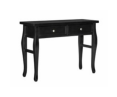

In [17]:
index = 200
display_image_with_index(index)

Image Desc:  AmazonBasics Serene 16-Piece Old Fashioned and Coolers Glass Drinkware Set
Image path:  ../artifacts/abo-images-small/images/small/07/075e5d67.jpg


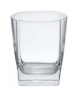

In [18]:
item_id = "B0896LJNLH"
display_image_with_item(item_id)

In [21]:
# lets embedd 100 items
dataset = ds[0:99].copy()

In [19]:
# use CLIP model to find similarity between image and text
model = SentenceTransformer('clip-ViT-B-32')

['B078VTMYYF', 'Amazon Brand - Wag Dry Dog Food for Puppies, Chicken and Lentil Recipe (5 lb. Bag) Trial', '71i8SuSVKGL', '71i8SuSVKGL', 1500, 1020, '5b/5b723420.jpg']
cosine:  0.3683439791202545


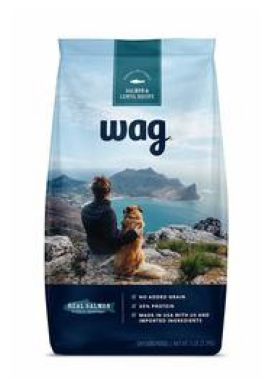

In [25]:
index = 12
print(dataset.iloc[index].tolist())

text_embedding  = model.encode(dataset.iloc[index]["item_name_in_en_us"])
image_path      = "../artifacts/abo-images-small/images/small/" + dataset.iloc[index]["path"]
image_pil       = Image.open(image_path).convert('RGB')
image_embedding = model.encode(image_pil)
cosine = util.cos_sim(image_embedding, text_embedding)
print("cosine: ", cosine.item())
plt.imshow(image_pil)
plt.axis('off')
plt.show()

In [28]:
# lets do image embedding for all 100 items
def images(path):
    image_path = "../artifacts/abo-images-small/images/small/" + str(path)
    return Image.open(image_path).convert('RGB')

def embedding(data):
    return model.encode(data)

dataset["image"] = dataset["path"].apply(images)

images = dataset["image"].to_list()
image_embeddings = model.encode(images)

In [42]:
len(images)

99

[{'corpus_id': 16, 'score': 0.26914680004119873}, {'corpus_id': 28, 'score': 0.2664998471736908}, {'corpus_id': 26, 'score': 0.261305034160614}]
ff/ffb123bf.jpg


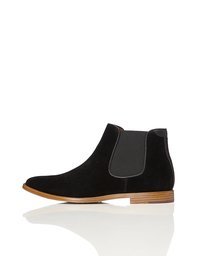

2b/2b56452e.jpg


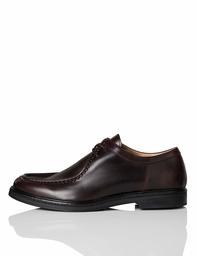

76/76846d3c.jpg


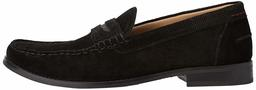

In [47]:
query="black shoes"
query_embedding = model.encode(query)
results = util.semantic_search(query_embedding, image_embeddings, top_k=3)[0]
print(results)
for r in results:
    print(dataset["path"][r['corpus_id']])
    display(images[r['corpus_id']])